In [2]:
!python --version


Python 3.10.9


### Student Performance Indicator

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

In [3]:
##import data and required package


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [8]:
df1 =pd.read_csv(r"data\stud.csv")

In [19]:
df1.shape

(1000, 8)

### Top 5 records

In [9]:
df1.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
df1.tail()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [11]:
df1.sample(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
537,female,group D,high school,standard,none,51,66,62
867,male,group B,associate's degree,standard,none,61,42,41
359,female,group D,some college,standard,none,80,90,89
13,male,group A,some college,standard,completed,78,72,70
473,female,group D,some high school,standard,none,59,67,61


### 2.2 Data info

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's   degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [21]:
df1.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### There is no missing value

#### 3.2 Check duplicate

In [23]:
df1.duplicated().sum()

0

#### 3.3 Check data type

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 3.4 check no. unique value in each column

In [16]:
df1.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### 3.5 chek statistics of datasetes

In [24]:
df1.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

#### 3.6 Exploring Data

In [26]:
df1.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [29]:
print("Categories in 'gender' variable:     ",end=" ")
print(df1['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df1['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df1['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df1['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df1['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [30]:
df1['gender'].dtype

dtype('O')

In [31]:
df1['math_score'].dtype

dtype('int64')

#### define numerical and categorical column

In [40]:
numerical_feature = [feature for feature in df1.columns if df1[feature].dtype != 'O']
categorical_feature = [feature for feature in df1.columns if df1[feature].dtype == 'O']


print(f"numeric features are:-   ",end=" "), print(numerical_feature)
print(f" categorical features are:-   ",end=" "), print(categorical_feature)

numeric features are:-    ['math_score', 'reading_score', 'writing_score']
 categorical features are:-    ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


(None, None)

In [41]:
df1.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


### 3.7 Adding columns for "Total Score" and "Average"

In [43]:
df1['Total_score'] = df1['math_score'] + df1['reading_score'] + df1['writing_score']
df1['Average'] =  df1['Total_score']/3
                      
df1

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


In [55]:
# len(df1[df1['math_score']==100])  #--> return count where math score ==100

math_fullmarks= df1[df1['math_score']==100]['Average'].count()
reading_fullmarks= df1[df1['reading_score']==100]['Average'].count()
writing_fullmarks= df1[df1['writing_score']==100]['Average'].count()


print("no of student with 100 marks in Math:-  {}".format(math_fullmarks))
print("no of student with 100 marks in reading:-  {}".format(reading_fullmarks))
print("no of student with 100 marks in writing:-  {}".format(writing_fullmarks))

no of student with 100 marks in Math:-  7
no of student with 100 marks in reading:-  17
no of student with 100 marks in writing:-  14


In [62]:
math_fullmarks= df1[df1['math_score'] <=20]['Average'].count()
reading_fullmarks= df1[df1['reading_score']<=20]['Average'].count()
writing_fullmarks= df1[df1['writing_score']<=20]['Average'].count()


print("no of student with less than 20 marks in Math:-  {}".format(math_fullmarks))
print("no of student with less than 20 marks in reading:-  {}".format(reading_fullmarks))
print("no of student with less than 20 marks in writing:-  {}".format(writing_fullmarks))

no of student with less than 20 marks in Math:-  4
no of student with less than 20 marks in reading:-  1
no of student with less than 20 marks in writing:-  3


#####  Insights
 - From above values we get students have performed the worst in Maths 
 - Best performance is in reading section

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

<Axes: xlabel='Average', ylabel='Count'>

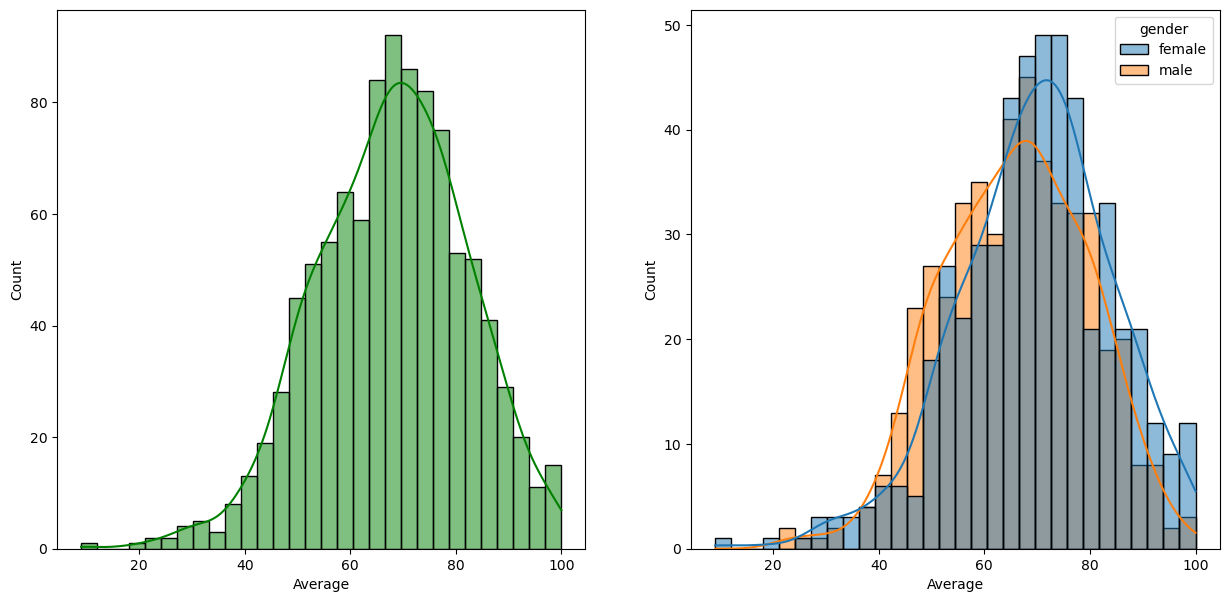

In [74]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)  #--> indicates 1-row 2-colum 1-position insubplot
sns.histplot(data=df1,x= 'Average',bins=30,kde=True,color='g',)  #kde= kernel density to smooth the distribution
plt.subplot(122)
sns.histplot(data=df1,x= 'Average',bins=30,kde=True,hue='gender')


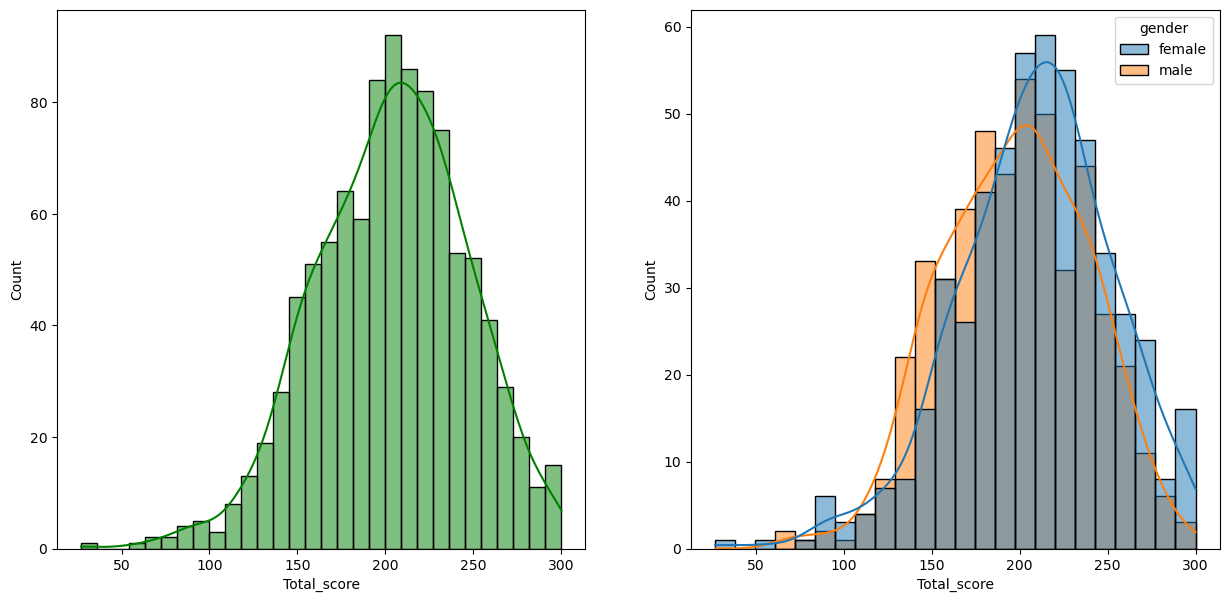

In [77]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df1,x='Total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df1,x='Total_score',kde=True,hue='gender')
plt.show()

#####  Insights
- Female students tend to perform well then male students.

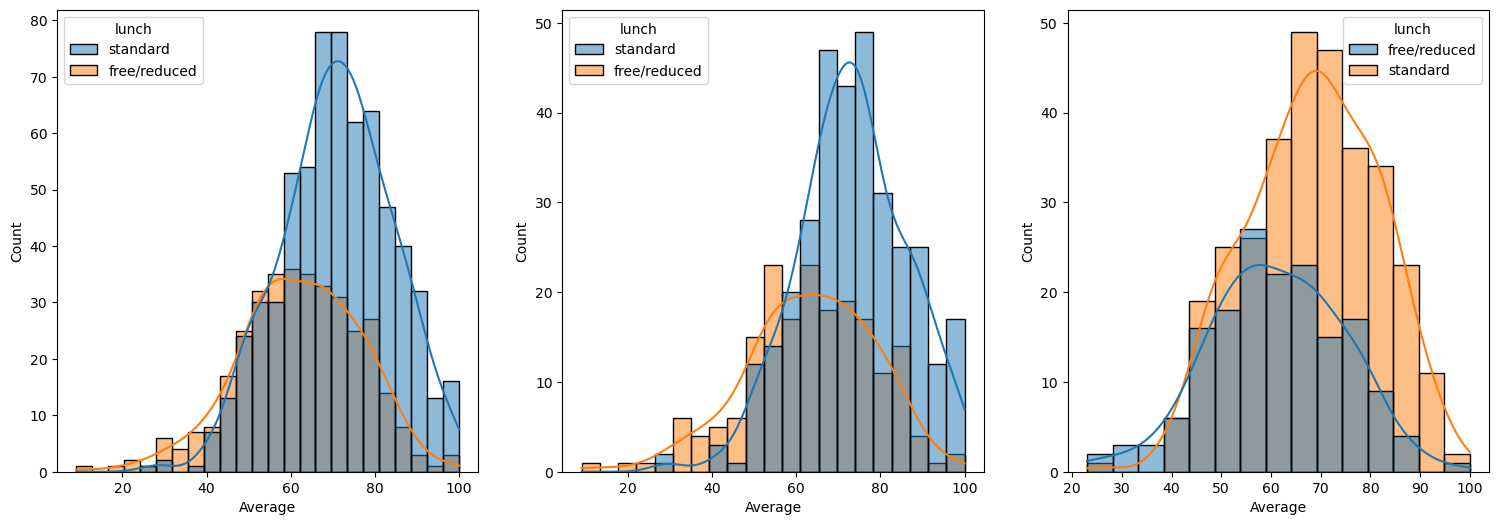

In [82]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df1,x='Average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df1[df1.gender=='female'],x='Average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df1[df1.gender=='male'],x='Average',kde=True,hue='lunch')
plt.show()